[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tayKZyBpQX0nswLEjX6f7smUwvHii6D9?usp=sharing)

# Text classification - IMDB Dataset

In [19]:
!pip install "transformers[sentencepiece]" datasets

## Datasets library

In [20]:
from huggingface_hub import list_datasets

datasets = list(list_datasets())
print(datasets[:10])

[DatasetInfo(id='zwhe99/DeepMath-103K', author='zwhe99', sha='736ce9bfca63afc046a07d545915fa261bbe843f', created_at=datetime.datetime(2025, 4, 14, 10, 41, 33, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2025, 4, 18, 6, 29, 38, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=7542, downloads_all_time=None, likes=133, paperswithcode_id=None, tags=['task_categories:text-generation', 'task_categories:text2text-generation', 'language:en', 'license:mit', 'size_categories:100K<n<1M', 'format:parquet', 'modality:text', 'library:datasets', 'library:dask', 'library:mlcroissant', 'library:polars', 'arxiv:2504.11456', 'region:us', 'math', 'reasoning', 'rl'], trending_score=112, card_data=None, siblings=None, xet_enabled=None), DatasetInfo(id='Anthropic/values-in-the-wild', author='Anthropic', sha='984078fc407bb5c6c3e754c8f571825754842a18', created_at=datetime.datetime(2025, 4, 10, 6, 4, 36, tzinfo=datetime.timezone.utc), last_modified=datetime

In [22]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [23]:
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [24]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

In [25]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [26]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [27]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [28]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [29]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [30]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [31]:
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [32]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

ModuleNotFoundError: No module named 'matplotlib'

In [42]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,This 1977 cult movie has two crazed lesbians (...,0
1284,"All day now I've been watching dinosaurs, and ...",0
408,There's so little here of the fantastic Anne R...,0
1282,If you have plenty of time to waste ... it's O...,0
1447,I have seen every episode of this spin off. I ...,0
1144,"Okay, I struggled to set aside the fact that i...",0
1381,"Dana Andrews stands ""Where the Sidewalk Ends"" ...",1
181,"This is, without a doubt, the single worst mov...",0
1183,"<br /><br />However, the ladies of all ages wi...",0
1103,Let me start out by saying this movie has 1 fu...,0


In [43]:
df.loc[0, 'text']

'This Lifetime style movie takes the middle aged divorcee victim who then finally fights back genre to new depths of cartoon-like absurdity.<br /><br />Here the 40 something stay-at-home ex-wife of a successful lawyer protagonist (daughter away at college) is starting a new life after her divorce, helped by a female college friend in opening a new dress shop as a sort of franchise expansion deal. She has even started up a friendship with her attractive, slightly younger perhaps, landscape architect / gardener (who\'s black). But then horror of middle-aged women\'s horrors, ANOTHER 20 something female she took on as a tenant to let a room to, starts \'taking over" her life.<br /><br />What this new younger woman threat really does is mildly flirt with the gardener, and offer him a glass of wine that * gasp * really belonged to the divorcee!! She runs up the utility bills by not turning down the thermostat!! And backed up the toilet! And leaves old food gone bad in the refrigerator! And 

In [44]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

'This Lifetime style movie takes the middle aged divorcee victim who then finally fights back genre to new depths of cartoon-like absurdity.Here the 40 something stay-at-home ex-wife of a successful lawyer protagonist (daughter away at college) is starting a new life after her divorce, helped by a female college friend in opening a new dress shop as a sort of franchise expansion deal. She has even started up a friendship with her attractive, slightly younger perhaps, landscape architect / gardener (who\'s black). But then horror of middle-aged women\'s horrors, ANOTHER 20 something female she took on as a tenant to let a room to, starts \'taking over" her life.What this new younger woman threat really does is mildly flirt with the gardener, and offer him a glass of wine that * gasp * really belonged to the divorcee!! She runs up the utility bills by not turning down the thermostat!! And backed up the toilet! And leaves old food gone bad in the refrigerator! And hangs her pieces of (Afr

In [45]:
df.label.value_counts()

label
0    809
1    791
Name: count, dtype: int64

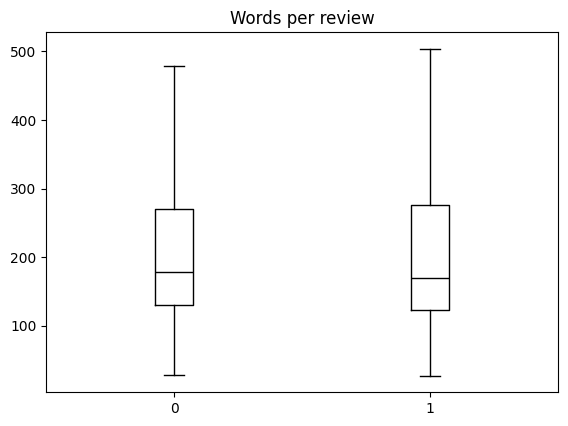

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [50]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
25,My favorite part of this film was the old man'...,1,38
483,One of my favorite scenes is at the beginning ...,1,29
552,Brilliant execution in displaying once and for...,1,27
1111,"""Foxes"" is a great film. The four young actres...",1,34
1127,"This is actually one of my favorite films, I w...",1,32
1201,Allison Dean's performance is what stands out ...,1,34
1274,A movie best summed up by the scene where a vi...,0,28


In [51]:
imdb.reset_format()

## Tokenizer

In [52]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

c:\Users\ejmig\anaconda3\envs\01_NLP\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ejmig\.cache\huggingface\hub\models--distilbert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Map: 100%|██████████| 400/400 [00:00<00:00, 3814.91 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [53]:
print(imdb_encoded['train'][0])

{'text': 'This Lifetime style movie takes the middle aged divorcee victim who then finally fights back genre to new depths of cartoon-like absurdity.<br /><br />Here the 40 something stay-at-home ex-wife of a successful lawyer protagonist (daughter away at college) is starting a new life after her divorce, helped by a female college friend in opening a new dress shop as a sort of franchise expansion deal. She has even started up a friendship with her attractive, slightly younger perhaps, landscape architect / gardener (who\'s black). But then horror of middle-aged women\'s horrors, ANOTHER 20 something female she took on as a tenant to let a room to, starts \'taking over" her life.<br /><br />What this new younger woman threat really does is mildly flirt with the gardener, and offer him a glass of wine that * gasp * really belonged to the divorcee!! She runs up the utility bills by not turning down the thermostat!! And backed up the toilet! And leaves old food gone bad in the refrigera

## Tiny IMDB

In [ ]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForImageTextToText',
 'AutoModelForImageToImage',
 'AutoModelForInstanceSegmentation',
 'AutoModelForKeypointDetection',
 'AutoModelForMaskGeneration',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTextEncoding',
 'AutoModelForTextToSpectrogram',
 'AutoModelForTextToWaveform',
 'AutoModelForTokenClassification',
 '

In [61]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [62]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [67]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                #   evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>=0.26.0'`

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss
1,0.698100,0.673002
2,0.690900,0.675429


In [ ]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[-0.06958597,  0.08243475],
       [-0.07667492,  0.11690364],
       [-0.05978067,  0.05852588],
       [-0.05062508,  0.09085844],
       [-0.07219092,  0.10617454],
       [-0.08734367,  0.11028455],
       [-0.06684104,  0.08281732],
       [-0.07786269,  0.10676245],
       [-0.06891385,  0.09251334],
       [-0.08195043,  0.10885128]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.7379708886146545, 'test_runtime': 0.375, 'test_samples_per_second': 26.664, 'test_steps_per_second': 5.333})

In [ ]:
preds.predictions.shape

(10, 2)

In [ ]:
preds.predictions.argmax(axis=-1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.3

In [ ]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  compute_metrics=get_accuracy,
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.657800,0.671555,0.600000
2,0.658600,0.675788,0.600000


## Training run

In [ ]:
batch_size = 16
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.461600,0.355774,0.862500
2,0.247800,0.343082,0.872500


In [ ]:


trainer.evaluate()

{'epoch': 2.0,
 'eval_accuracy': 0.895,
 'eval_loss': 0.3591071367263794,
 'eval_runtime': 13.6299,
 'eval_samples_per_second': 29.347,
 'eval_steps_per_second': 3.668}

In [ ]:
trainer.save_model()

In [ ]:
model_name

'bert-base-cased-finetuned-imdb'

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

[{'label': 'LABEL_0', 'score': 0.9525713324546814}]

In [ ]:
classifier('This was beyond incredible')

[{'label': 'LABEL_1', 'score': 0.8722493052482605}]